In [1]:
import xarray as xr
from matplotlib import pyplot as plt
import cfgrib

In [2]:
ds = xr.load_dataset("test.grib", engine="cfgrib")

In [3]:
ds.head()

<xarray.Dataset>
Dimensions:        (time: 2, latitude: 5, longitude: 5)
Coordinates:
    number         int64 0
  * time           (time) datetime64[ns] 2022-06-01T12:00:00 2022-06-02T12:00:00
    step           timedelta64[ns] 00:00:00
    isobaricInhPa  float64 1e+03
  * latitude       (latitude) float64 90.0 89.75 89.5 89.25 89.0
  * longitude      (longitude) float64 0.0 0.25 0.5 0.75 1.0
    valid_time     (time) datetime64[ns] 2022-06-01T12:00:00 2022-06-02T12:00:00
Data variables:
    t              (time, latitude, longitude) float32 268.3 268.3 ... 268.1
Attributes:
    GRIB_edition:            1
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2022-07-06T11:40 GRIB to CDM+CF via cfgrib-0.9.1...

In [4]:
ds = ds - 273.15

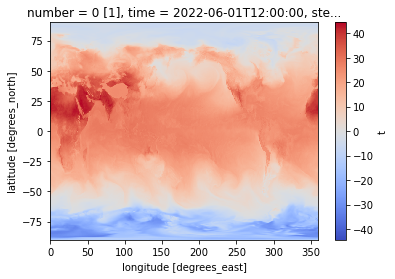

In [5]:
ds.t[0].plot(cmap=plt.cm.coolwarm)

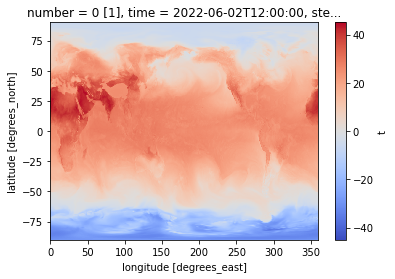

In [6]:
ds.t[1].plot(cmap=plt.cm.coolwarm)

In [7]:
lat = ds.latitude
lon = ds.latitude
temp = ds.t

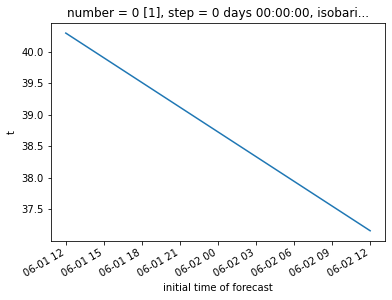

In [8]:
ds.t.sel(longitude=28.0, latitude=12.0).plot()

In [31]:
for variable in ds:
    print(f"Variable: {variable}")
    print(f"Variable: {ds[variable].attrs.keys()}")

Variable: t
Variable: dict_keys([])


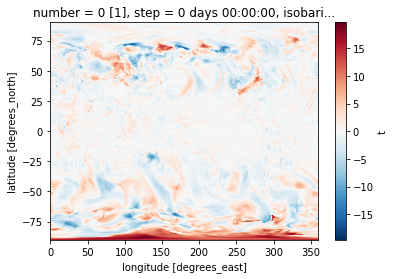

In [32]:
ds_test = ds["t"][0] - ds["t"][1]
ds_test.plot()

In [33]:
ds_temp = ds.get("t")

In [40]:
ds_temp.longitude

<xarray.DataArray 'longitude' (longitude: 1440)>
array([0.0000e+00, 2.5000e-01, 5.0000e-01, ..., 3.5925e+02, 3.5950e+02,
       3.5975e+02])
Coordinates:
    number         int64 0
    step           timedelta64[ns] 00:00:00
    isobaricInhPa  float64 1e+03
  * longitude      (longitude) float64 0.0 0.25 0.5 0.75 ... 359.2 359.5 359.8
Attributes:
    units:          degrees_east
    standard_name:  longitude
    long_name:      longitude